In [3]:
# ! pip install ydata_profiling

In [4]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from ydata_profiling import ProfileReport
# from pandas_profiling import ProfileReport
# from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score


## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [5]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('final_data.csv')

In [6]:
# profile = ProfileReport(df, explorative=True)  # Create profile report
# profile.to_file("report.html")  # Save as an interactive HTML file
# files.download("report.html") # Download the HTML report file  into local machine

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [7]:
# Display the first 3 rows of the DataFtrame
df.head(3)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [8]:
# Display the first 3 rows of the DataFtrame
df.head(3)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0


In [9]:
# Print number of rows and columns
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns')

This dataset has 10754 rows and 22 columns


In [10]:
# Print lebel of the columns
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

1- `player`: URL link to the [Transfermarkt](www.transfermarkt.com) page contains player data.

2- `team`: Name of the team that player played for at the time data was collected.

3- `name`: Name of player.

4- `position`: Position that player played most.

5- `height`: Height of player (cm Unit).

6- `age`: Age of player.

7- `appearance`: The number of times a player appear on field.

8- `goals`: Goals scored.

9- `assists`: Assits to goals.

10- `yellow cards`: The number of times a player receives a single yellow card in a match.

11- `second yellow cards`: The number of times a player receives a second yellow card in the same match, which results in a red card and expulsion from the game.

12- `red cards`: The number of times a player receives a direct red card, leading to immediate expulsion from the match without a prior yellow card.

13- `goals conceded`: Number of goals conceded by the goalkeeper in the match.

14- `clean sheets`: Number of matches in which the goalkeeper did not concede goals.

15- `minutes played`: Total number of minutes played by the player.

16- `days_injured`: The number of days the player was absent due to injury.

17- `games_injured`: The number of matches the player missed due to injury.

18- `award`: Number of individual awards won by the player.

19- `current_value`: Current player market value (€).

20- `highest_value`: Highest market value reached by the player (€).

21- `position_encoded`:Representing the player's position with numbers "coding the four positions": (1 = Goalkeeper, 2 = Defender, 3 = Midfielder, 4 = Forward)

22- `winger`: Is the player winger? (1: winger, 0: not a winger)

In [11]:
# Print the inforamtion about the data like missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

- There are no missing values in this data.
- The data types are correct for all columns.

In [12]:
# Generate descriptive statistics for categorical (object-type) columns in the  DataFrame.
# This will provide insights such as unique values, most frequent values (top), and their counts (freq).
df.describe(include='object')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


**Insights:**

1- There are 374 unique teams in the dataset.

2- The most frequent team is Daejeon Hana Citizen, appearing 46 times, indicating that this club has more recorded player instances than any other.

3- Some player names appear multiple times, possibly because of multiple seasons, transfers, or duplicate records. The most frequent player name is "Paulinho", appearing 6 times. This suggests that there are multiple players with the same name, which is common in football.

In [13]:
# Print count of hte unique values in categorical features
categorical_features = ['player', 'team', 'team', 'position']

for i in categorical_features:
  print(df[i].value_counts())
  print(8*'----')

player
/david-de-gea/profil/spieler/59377             1
/bongokuhle-hlongwane/profil/spieler/669202    1
/joseph-rosales/profil/spieler/657225          1
/robin-lod/profil/spieler/173573               1
/emanuel-reynoso/profil/spieler/439626         1
                                              ..
/kayque/profil/spieler/813037                  1
/breno/profil/spieler/697400                   1
/patrick-de-paula/profil/spieler/737821        1
/gabriel-pires/profil/spieler/167291           1
/alexander-badolato/profil/spieler/957230      1
Name: count, Length: 10754, dtype: int64
--------------------------------
team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
-----------------

In [14]:
# Generate descriptive statistics for all numeric columns in the DataFrame.
# This includes count, mean, standard deviation, min, max, and quartiles.
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

The data was scraped from `Transfermarkt`, a globally renowned website that collects information about football players, clubs, transfers, statistics, and market values. It is widely relied upon by sports journalists, data analysts, and clubs to obtain insights into the transfer market and player performance.

#### 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

The data reflects the period of interest for the analysis. The period covers two seasons: 2021-2022 and 2022-2023.



# New Section

#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


The data is consistent since it only one data source.

#### 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


**1- Sample Appropriateness:**

The data sample aligns with our analysis objectives. It's about the players data and in the specified period of time.

**2- Variable Selection:**

All columns are important and relevant to our anlaysis objectives. No need for drop any column.

#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


In [15]:
df.duplicated().sum()

0

In [16]:
# no duplicate rows

#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [17]:
#Display number missing values per column
df.isnull().sum()

,0
player,0
team,0
name,0
position,0
height,0
age,0
appearance,0
goals,0
assists,0
yellow cards,0


In [18]:
# no missing values

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [19]:
# check columns types
df.dtypes

,0
player,object
team,object
name,object
position,object
height,float64
age,float64
appearance,int64
goals,float64
assists,float64
yellow cards,float64


In [20]:
# data types are correct for all columns

In [21]:
# check outliers

In [22]:
football_color_palette = {
    "light_gray": "#ebe1e1",
    "medium_gray": "#a49d9d",
    "white": "#ffffff",
    "dark_brown": "#5c4732",
    "darker_brown": "#403123",
    "warm_brown": "#775c41",
    "soft_brown": "#9c7b68",
    "deep_brown": "#6d5648",
    "peach_brown": "#ca9f87",
    "soft_green": "#819981",
    "deep_green": "#5a6b5a",
    "light_green": "#a7c6a7",
    "warm_orange": "#b47c3d",
    "dark_orange": "#7d562a",
    "bright_orange": "#eaa14f",
    "earthy_gray": "#727151",
    "deep_olive": "#4f4f38",
    "muted_olive": "#949269",
    "sage_green": "#a2b28d",
    "forest_green": "#717c62"
}

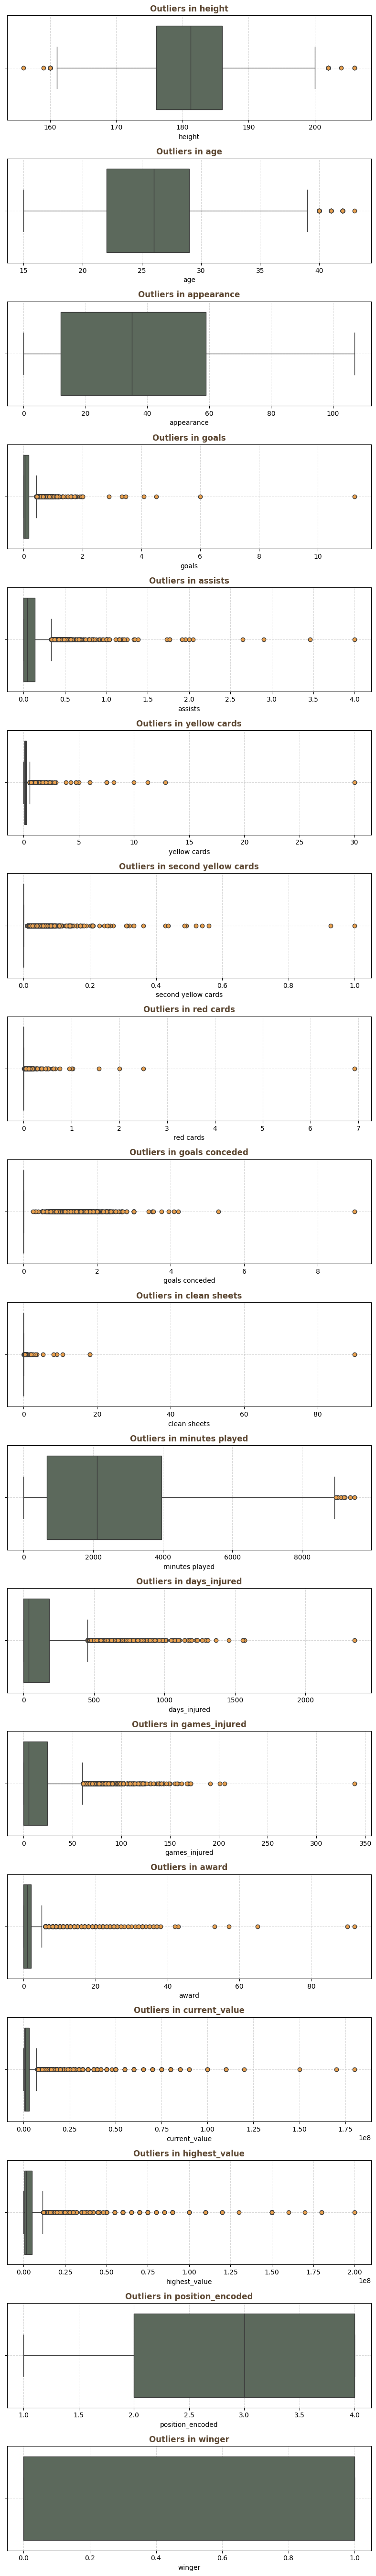

In [23]:
# Choose the color from `football_color_palette`
outlier_color = football_color_palette["bright_orange"]
box_color = football_color_palette["deep_green"]

# Choose only numerical features to analyze outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Box-plot to check the outliers for each column
num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_cols, figsize=(8, num_cols * 3))

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], color=box_color,
                flierprops={"markerfacecolor": outlier_color, "marker": "o"}, ax=axes[i])
    axes[i].set_title(f"Outliers in {col}", fontsize=12, fontweight='bold', color=football_color_palette["dark_brown"])
    axes[i].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

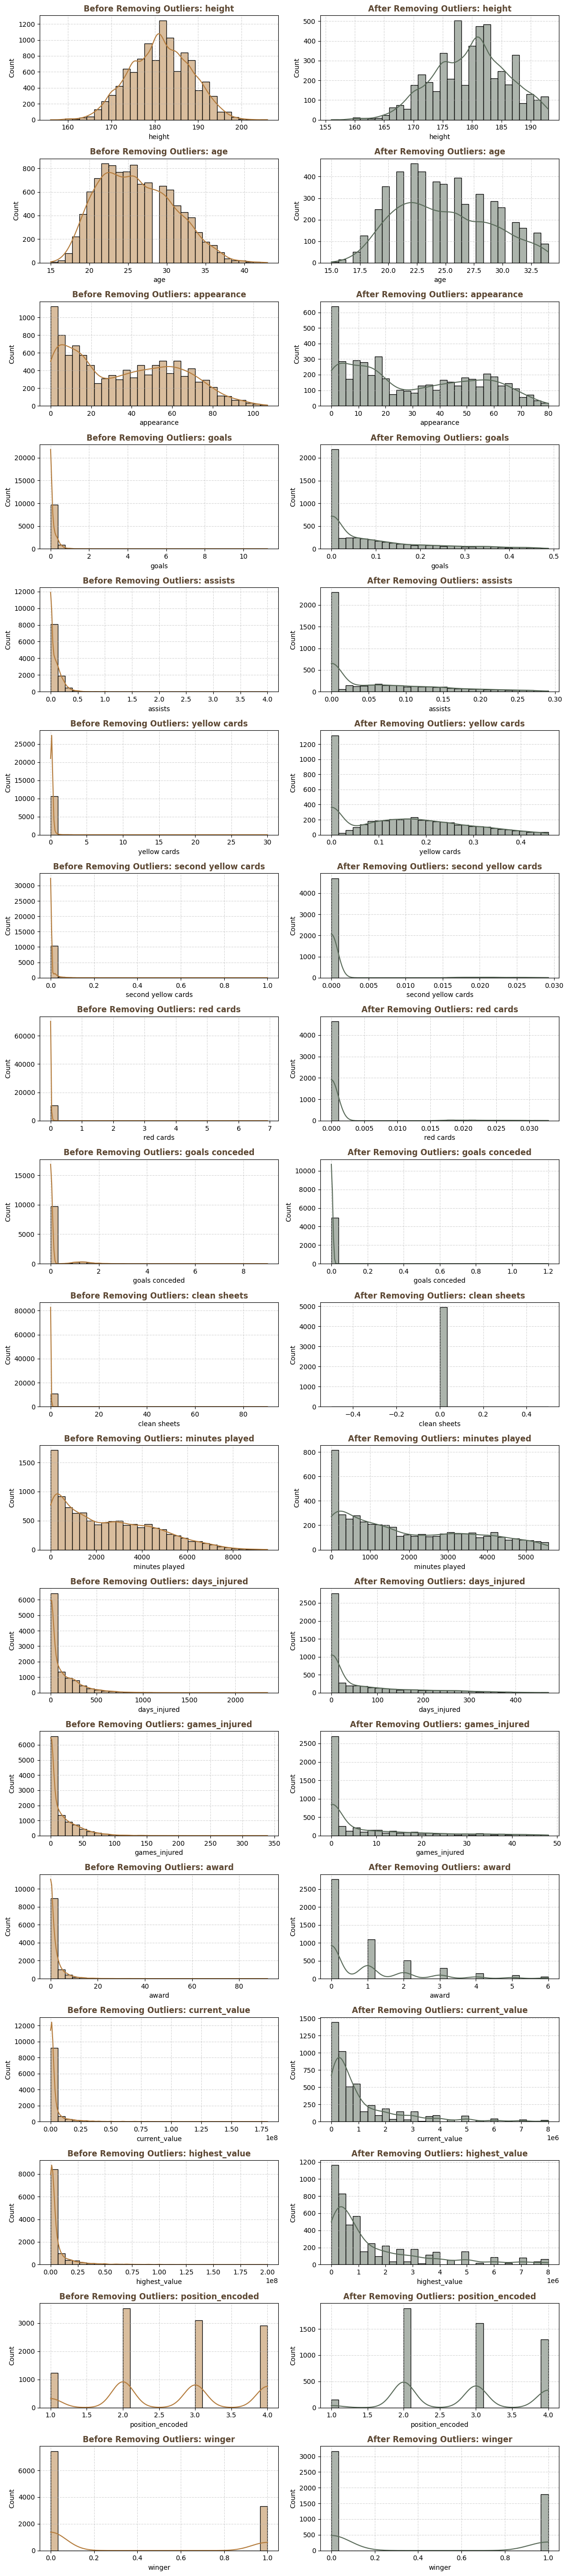

In [24]:
def remove_outliers(df, columns):
    for col in columns:
        upper_limit = df[col].quantile(0.95)
        df = df[df[col] <= upper_limit]
    return df

df_original = df.copy()

df_cleaned = remove_outliers(df, numeric_columns)

num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(12, num_cols * 3))

for i, col in enumerate(numeric_columns):
    sns.histplot(df_original[col], bins=30, kde=True, color=football_color_palette["warm_orange"], ax=axes[i, 0])
    axes[i, 0].set_title(f"Before Removing Outliers: {col}", fontsize=12, fontweight='bold', color=football_color_palette["dark_brown"])
    axes[i, 0].grid(True, linestyle="--", alpha=0.5)

    sns.histplot(df_cleaned[col], bins=30, kde=True, color=football_color_palette["deep_green"], ax=axes[i, 1])
    axes[i, 1].set_title(f"After Removing Outliers: {col}", fontsize=12, fontweight='bold', color=football_color_palette["dark_brown"])
    axes[i, 1].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

**Insights:**
- `For Players Hieght`:

  - After removing outliers using the 95% percentile, the height distribution is now concentrated below 190 cm.
  - This aligns with the typical height range for most professional football players, excluding exceptionally tall goalkeepers and defenders.
  - Before removal, the dataset contained some extremely tall players (above 190 cm), likely goalkeepers or rare cases.
  - Now, the dataset represents a more balanced distribution, focusing on the majority of players rather than extreme cases.
  - The natural height range for most football players falls below 190 cm, and the dataset now better represents the standard physical profile of professional players.

- `For Players Age`:
  - After removing outliers using the 95% percentile, the maximum age is now around 32-33 years.
  - This aligns with the typical peak performance range for most professional football players.
  - Before removal, the dataset contained some extremely old players (above 40 years), which are rare exceptions.
  - Now, the dataset focuses on the prime playing years (18-32), where most players are active and competitive.
  - The age distribution is now more realistic for evaluating player performance and market value.
  - The natural career span of a professional football player typically ranges between 18-32 years, and the dataset now better reflects the core age group of active players.

- `For Players Appearance`:
  - After removing outliers using the 95% percentile, the maximum number of appearances is now significantly reduced.
  - This aligns with the expected match participation for most professional players over a reasonable period.
  - Before removal, the dataset included players with an extremely high number of appearances, which may represent long-serving veterans or statistical anomalies.
  - Now, the dataset focuses on the majority of players, ensuring that the appearance distribution is more balanced.
  - The dataset now better represents typical player career lengths, reducing the impact of rare cases that might skew overall statistics.
  - The number of appearances now better reflects the typical career participation of football players, improving the reliability of performance and career progression analysis.

- `For Goals`:
  - Before removing outliers, the goal distribution had a long tail, with some players having exceptionally high goal-per-game ratios.
  - After removing outliers using the 95% percentile, the dataset now focuses on players with goal ratios below ~0.35 per game.
  - The distribution remains right-skewed, meaning most players score very few goals.
  - Players with extremely high goal-scoring ratios (rare elite strikers) were removed to make the dataset more balanced.
  - The concentration of players with 0 goals remains high, likely due to a large number of defenders and midfielders in the dataset.
  - The dataset now better represents typical goal-scoring rates, excluding rare prolific scorers.
  - The goal distribution remains highly skewed, with most players scoring very few goals. The removal of extreme outliers ensures that the analysis focuses on typical goal-scoring patterns rather than rare, high-performing exceptions.

- `For Assists`:
  - Before removing outliers, the assist distribution was highly right-skewed, with a few players having exceptionally high assist rates.
  - After applying the 95% percentile filter, the dataset now focuses on players with assist ratios below ~0.20 per game, removing extreme cases.
  - A large portion of players still have 0 assists, which is expected as many players (especially defenders and goalkeepers) do not contribute assists.
  - Players with very high assist-per-game ratios were removed, resulting in a more balanced dataset.
  - The distribution remains positively skewed, but now better represents the general population rather than rare playmakers.
  - The assist distribution is now more aligned with the average player, reducing bias from outliers who create an exceptionally high number of assists.
  
- `For Yellow Cards`:
  - Before removing outliers, the yellow card distribution was right-skewed, with a few players accumulating an exceptionally high number of cards.
  - After applying the 95% percentile filter, the dataset now focuses on players receiving fewer than ~0.35 yellow cards per game, eliminating extreme disciplinary cases.
  - A large portion of players still have 0 yellow cards, as many positions (e.g., goalkeepers, certain midfielders) receive few to no bookings.
  - The long tail of high yellow-card accumulators was reduced, making the distribution more balanced.
  - The density of players with moderate yellow card counts is now more apparent, improving the analysis of typical disciplinary trends.
  - The dataset now better represents typical yellow card accumulation, reducing bias from aggressive defenders or midfielders who frequently get booked.

- `For Second Yellow Cards`:
  - Before removing outliers, the distribution was highly right-skewed, meaning very few players received a second yellow card in a match.
  - The vast majority of players never received a second yellow card, causing a strong peak at zero.
  - After applying the 95% percentile filter, only typical values remain, but the distribution appears largely unchanged.
  - Since receiving a second yellow card is a rare event, most values were already concentrated around zero.
  - The right tail (players who received multiple second yellow cards) was reduced.
  - The dataset confirms that most players rarely get sent off for two yellow cards, meaning this feature has limited variation.

- `For Red Cards`:
  - Before removing outliers, the distribution was heavily right-skewed, meaning very few players received red cards, with most having a count of zero.
  - The dataset shows that receiving a red card is a rare event in football.
  - After applying the 95% percentile filter, the dataset retains only players with a typical number of red cards, eliminating extreme cases.
  - Since red cards are infrequent, the vast majority of players had zero red cards, creating a strong peak at zero.
  - The removal of outliers reduced the influence of players with exceptionally high red card counts, but the distribution largely remains unchanged.
  - The dataset confirms that most players do not receive red cards, meaning this feature has very limited variation.

- `For Goals Conceded & Clean Sheets`:
  - Before removing outliers, the distribution is heavily right-skewed, meaning most players (likely non-goalkeepers) have 0 goals conceded.
  - A small portion of players (goalkeepers and defenders) have higher goals conceded, causing a long right tail.
  - The distribution is heavily skewed toward zero, indicating that most players do not record clean sheets (likely non-goalkeepers).
  - A few goalkeepers with high clean sheet records created a long right tail.
  - After removing outliers, the dataset almost entirely consists of zero values, suggesting that goalkeepers with high goals conceded were removed.
  - The dataset now mostly consists of zero values, implying that goalkeepers with notable clean sheet records were removed.
  - The dataset confirms that goals conceded and clean sheets are almost exclusive to goalkeepers.
  -  The removal of outliers may have over-filtered the dataset, removing important goalkeeper statistics.
  - If analyzing goalkeeper performance, it might be beneficial to retain some outliers to keep meaningful variation.

- `For Minutes Played`:
  - Before removing outliers, the distribution was right-skewed, with most players having low playing time and a small number playing over 5000 minutes.
  - The peak at zero suggests a significant number of players who had no game time (likely substitutes or reserve players).
  - After applying the 95% percentile filter, extreme cases were removed, making the dataset more representative of typical playing times.
  - The overall shape of the distribution remains similar, but the long tail has been shortened.
  - The peak at zero still exists, confirming that many players did not participate in matches.
  - The distribution of minutes played remains skewed, but now better represents general player participation trends, ensuring a fairer analysis of player involvement.
  
- `For Injury (Days Injured & Games Injured)`:
  - Before Removing Outliers, The distribution in injuries days was highly right-skewed, with most players having low injury durations, while a few had extreme long-term injuries (over 400 days).The peak at zero suggests many players did not experience injuries.
  - The distribution in games injuries was again right-skewed, meaning most players missed only a few games due to injury, while some missed an entire season. A significant portion of players did not miss any games at all (zero values).
  - After Removing Outliers, for injuries days  the upper range was reduced to below ~250 days, removing extreme long-term injuries. The general shape remains the same, but the dataset now focuses on typical injury recovery periods.
  - For games injuried the upper limit was reduced to ~25 games, ensuring that extreme cases (players who missed nearly an entire season) were removed. The overall shape remains, but the long tail is now shortened, making the dataset more balanced.
  - The injury data is now more representative of normal recovery times, making it useful for assessing player availability and fitness trends.

- `For Awards`:
  - Before removing outliers, the distribution was highly right-skewed, with most players having zero awards, while a few players had up to six awards.
  - The long tail suggests that a small number of elite players received multiple awards.
  - After applying the 95% percentile filter, extreme award counts were reduced, leaving a maximum of around three awards per player.
  - The majority of players still have zero awards, meaning awards are relatively rare.
  - The removal process eliminated players with exceptionally high award counts, shifting focus to players with 1 to 3 awards.
  - The overall shape remains similar, but with fewer extreme cases.
  - The distribution of awards remains highly skewed, but now provides a clearer representation of player recognition trends, making the dataset more balanced for general analysis.

- `For Player Market Value (Current & Highest)`:
  - Before Removing Outliers, The distribution is heavily right-skewed, indicating that most players have low market values, while a small number have very high values (above 7 million). The long tail suggests that elite players significantly increase the range of values.
  - Similar to current value, most players never had a high peak market value, with only a few reaching above 7 million. The long tail suggests that some players had rapid market growth in their careers.
  - After Removing Outliers, The maximum value is now around 3 million, eliminating extreme cases. The dataset is more balanced, but top-valued players have been removed, which may affect analysis of elite players.
  - The highest retained values are around 3 million, removing top-tier players. The dataset now focuses on typical player trajectories, rather than extreme cases.
  - The filtered dataset is now more balanced, making it better suited for general analysis, but it removes insights on elite players and their transfer dynamics.

- `For Player Positions`:
  - Before Removing Outliers, the four player positions (Goalkeeper=1, Defender=2, Midfielder=3, Forward=4) show distinct peaks, indicating a balanced distribution. The dataset appears well-categorized, with no major outliers affecting the position encoding.
  - After Removing Outliers, the distribution remains the same, meaning no significant outliers were removed. This confirms that player position is a categorical variable with no extreme values.
  - Player positions is well-distributed, with no significant outliers.


- `For Winger Role`:
  - Before Removing Outliers, most players are not wingers (0), but there is a noticeable group of players categorized as wingers (1). No extreme outliers are visible.
  - After Removing Outliers, the distribution is nearly identical, meaning the winger classification did not have extreme values. Removing outliers had minimal impact, reinforcing that winger roles are correctly categorized.
  - Winger roles is well-distributed, with no significant outliers.

**What is an Outlier?**
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR

![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [25]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [26]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics

In [27]:
# go to delete ouliers

## 2. Data Cleaning:

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


### Correcting errors

-------------------

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [28]:
# The data is cleaning

## Analysis

### 3. Univariate Analysis:

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis:

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

### 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart|


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

In [29]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

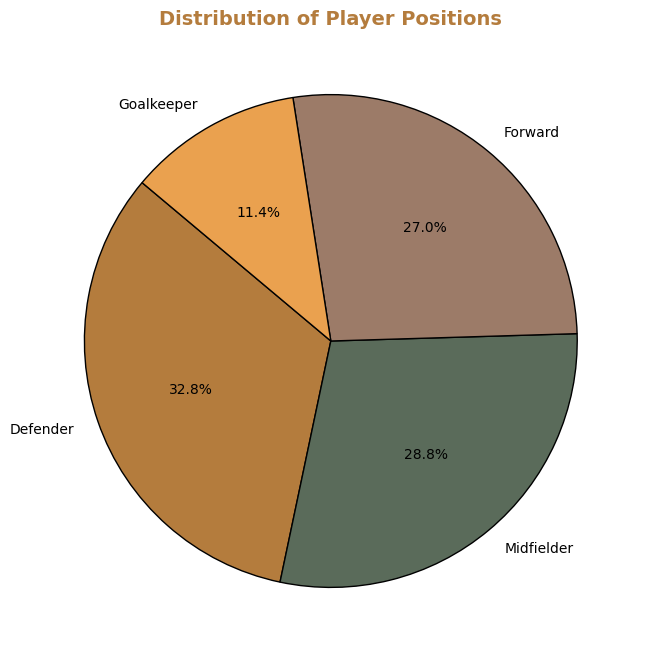

In [30]:
# Create a mapping dictionary for position encoding
position_mapping = {
    1: "Goalkeeper",
    2: "Defender",
    3: "Midfielder",
    4: "Forward"
}

# Replace numbers with their corresponding position names
positions = df["position_encoded"].map(position_mapping)


# Count values for each position
position_counts = positions.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index,
        autopct='%1.1f%%', colors=[football_color_palette["warm_orange"],
                                   football_color_palette["deep_green"],
                                   football_color_palette["soft_brown"],
                                   football_color_palette["bright_orange"]],
        startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title("Distribution of Player Positions", fontsize=14, fontweight='bold', color=football_color_palette["warm_orange"])
plt.show()


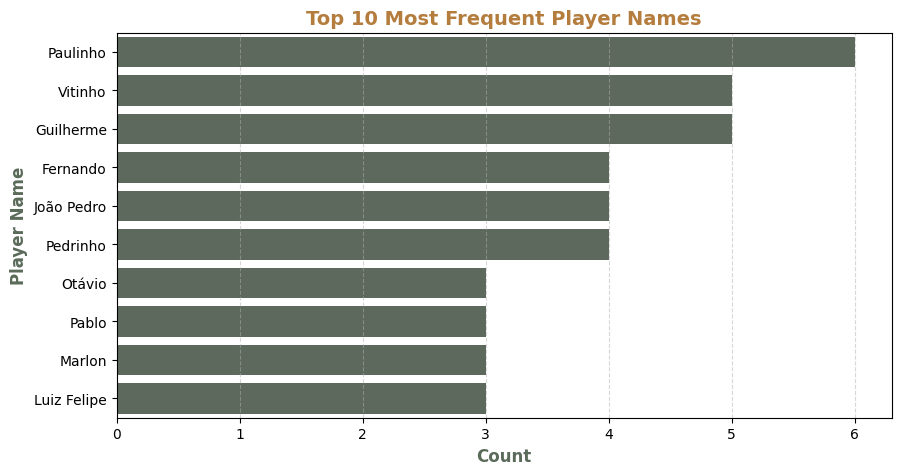

------------------------------------------------------------------------------------------------------------------------------------------------------


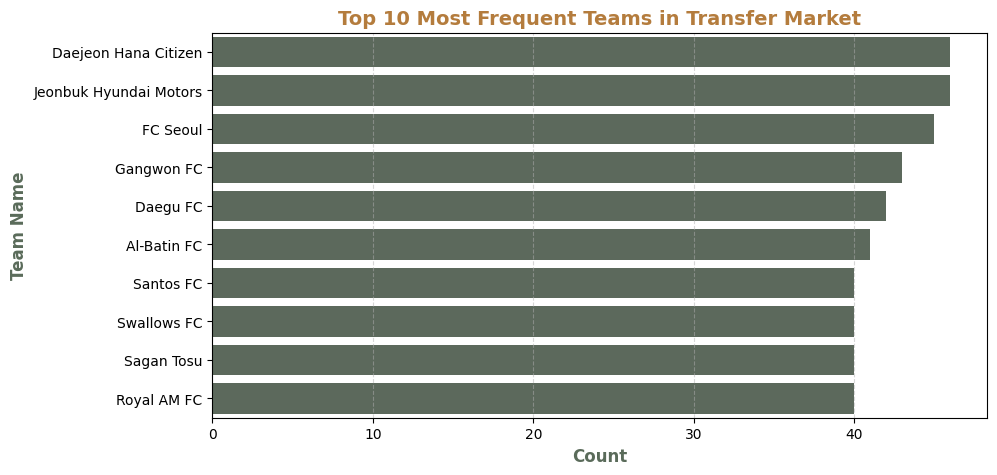

In [31]:
# Extract the 10 most repeated names
top_10_names = df["name"].value_counts().nlargest(10)

# Bar chart of the top 10 most common names
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_names.values, y=top_10_names.index, color=football_color_palette["deep_green"])  # اللون الأخضر
plt.xlabel("Count", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.ylabel("Player Name", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.title("Top 10 Most Frequent Player Names", fontsize=14, fontweight='bold', color=football_color_palette["warm_orange"])  # العنوان باللون البرتقالي
plt.grid(axis='x', linestyle="--", alpha=0.5)
plt.show()

print(50*"---")

# Extract the 10 most frequent teams
top_10_teams = df["team"].value_counts().nlargest(10)

# Bar chart of the top 10 most popular teams
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_teams.values, y=top_10_teams.index, color=football_color_palette["deep_green"])  # اللون الأخضر
plt.xlabel("Count", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.ylabel("Team Name", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.title("Top 10 Most Frequent Teams in Transfer Market", fontsize=14, fontweight='bold', color=football_color_palette["warm_orange"])  # العنوان باللون البرتقالي
plt.grid(axis='x', linestyle="--", alpha=0.5)
plt.show()


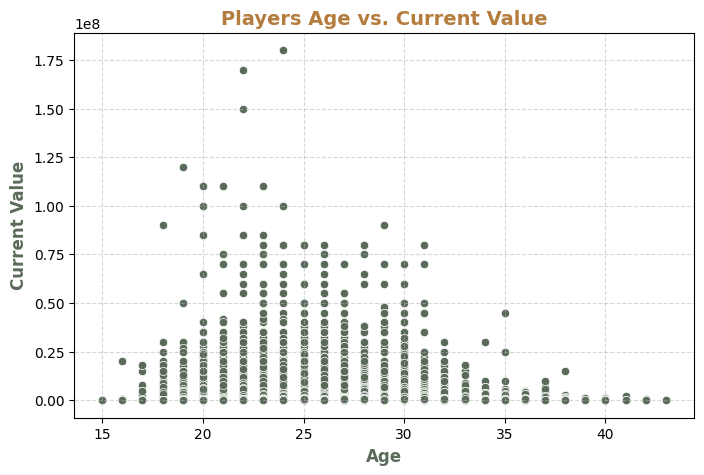

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["age"], y=df["current_value"], color=football_color_palette["deep_green"])
plt.xlabel("Age", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.ylabel("Current Value", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.title("Players Age vs. Current Value", fontsize=14, fontweight='bold', color=football_color_palette["warm_orange"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


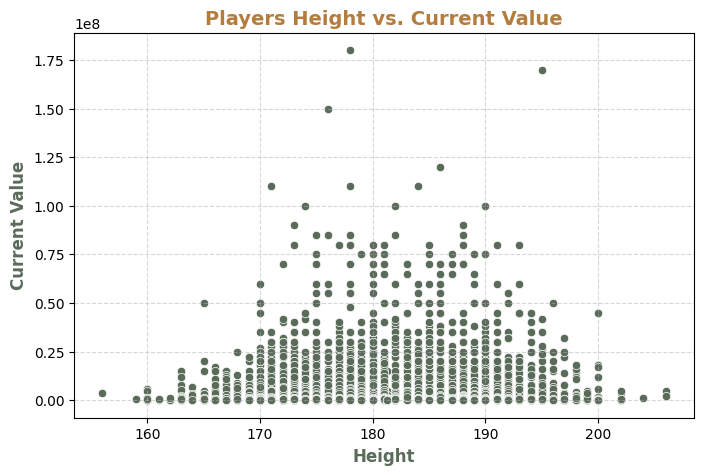

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["height"], y=df["current_value"], color=football_color_palette["deep_green"])
plt.xlabel("Height", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.ylabel("Current Value", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.title("Players Height vs. Current Value", fontsize=14, fontweight='bold', color=football_color_palette["warm_orange"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


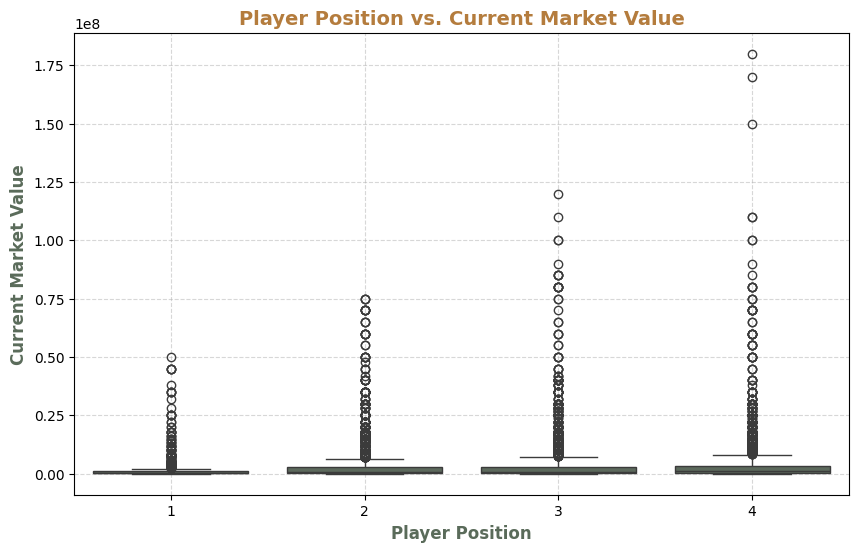

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["position_encoded"], y=df["current_value"], palette=[football_color_palette["deep_green"]])
plt.xlabel("Player Position", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.ylabel("Current Market Value", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.title("Player Position vs. Current Market Value", fontsize=14, fontweight='bold', color=football_color_palette["warm_orange"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [35]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

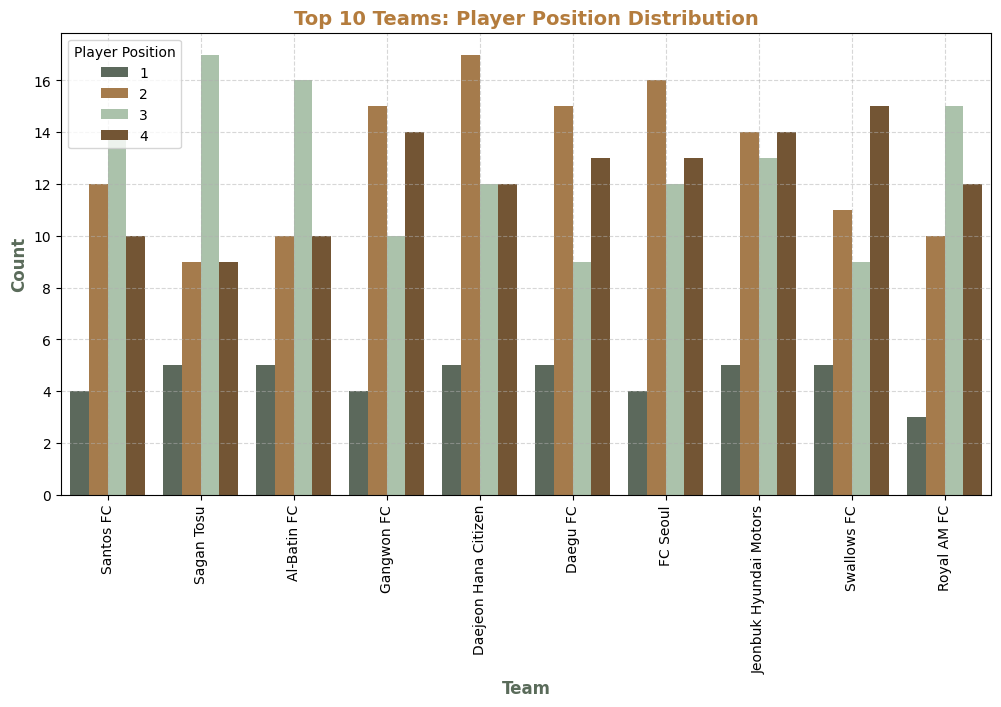

In [36]:
# Filter the data to include only the top 10 teams by number of players.
top_10_teams = df["team"].value_counts().nlargest(10).index
df_top_teams = df[df["team"].isin(top_10_teams)]

# Plot a chart showing the distribution of player positions across the top 10 teams.
plt.figure(figsize=(12, 6))
sns.countplot(x=df_top_teams["team"], hue=df_top_teams["position_encoded"],
              palette=[football_color_palette["deep_green"],
                       football_color_palette["warm_orange"],
                       football_color_palette["light_green"],
                       football_color_palette["dark_orange"]])

plt.xlabel("Team", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.ylabel("Count", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.title("Top 10 Teams: Player Position Distribution", fontsize=14, fontweight='bold', color=football_color_palette["warm_orange"])
plt.xticks(rotation=90)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Player Position")
plt.show()


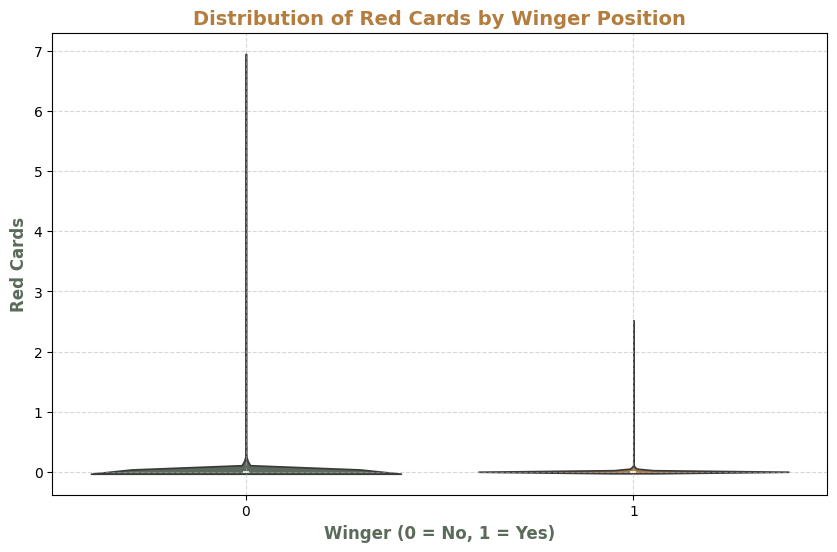

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df["winger"], y=df["red cards"], palette=[football_color_palette["deep_green"],
                                                            football_color_palette["warm_orange"]])

plt.xlabel("Winger (0 = No, 1 = Yes)", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.ylabel("Red Cards", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.title("Distribution of Red Cards by Winger Position", fontsize=14, fontweight='bold', color=football_color_palette["warm_orange"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


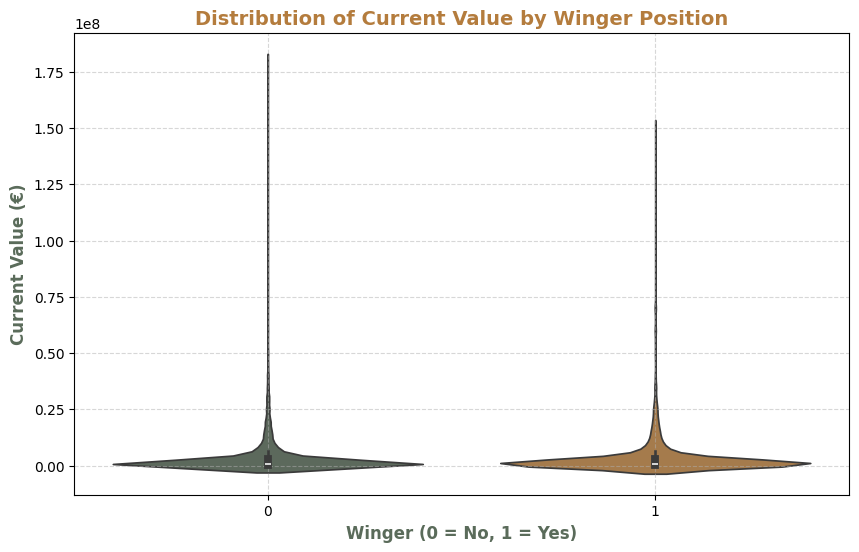

In [38]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df["winger"], y=df["current_value"], palette=[football_color_palette["deep_green"],
                                                                football_color_palette["warm_orange"]])

plt.xlabel("Winger (0 = No, 1 = Yes)", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.ylabel("Current Value (€)", fontsize=12, fontweight='bold', color=football_color_palette["deep_green"])
plt.title("Distribution of Current Value by Winger Position", fontsize=14, fontweight='bold', color=football_color_palette["warm_orange"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


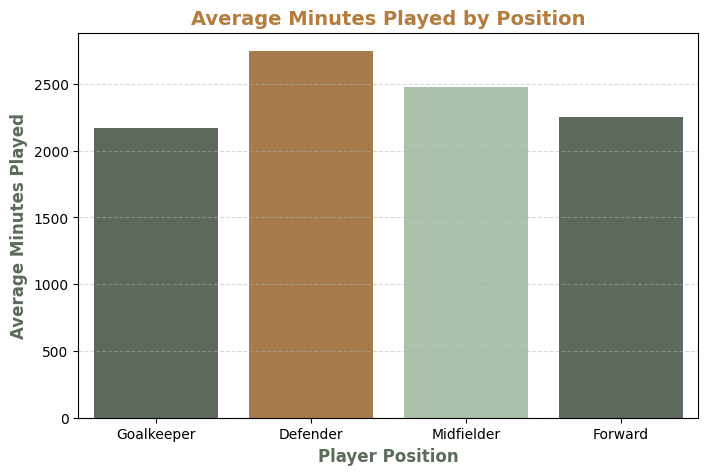

In [39]:
# Calculate the average minutes played for each position
avg_minutes_by_position = df.groupby("position_encoded")["minutes played"].mean().reset_index()

# Assign center names instead of numbers
position_labels = {1: "Goalkeeper", 2: "Defender", 3: "Midfielder", 4: "Forward"}
avg_minutes_by_position["position_encoded"] = avg_minutes_by_position["position_encoded"].map(position_labels)


# Plot a bar chart
# Define colors directly from football color_palette
custom_palette = ["#5a6b5a", "#b47c3d", "#a7c6a7"]

plt.figure(figsize=(8, 5))
sns.barplot(x="position_encoded", y="minutes played", data=avg_minutes_by_position, palette=custom_palette)

plt.xlabel("Player Position", fontsize=12, fontweight="bold", color="#5a6b5a")
plt.ylabel("Average Minutes Played", fontsize=12, fontweight="bold", color="#5a6b5a")
plt.title("Average Minutes Played by Position", fontsize=14, fontweight="bold", color="#b47c3d")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

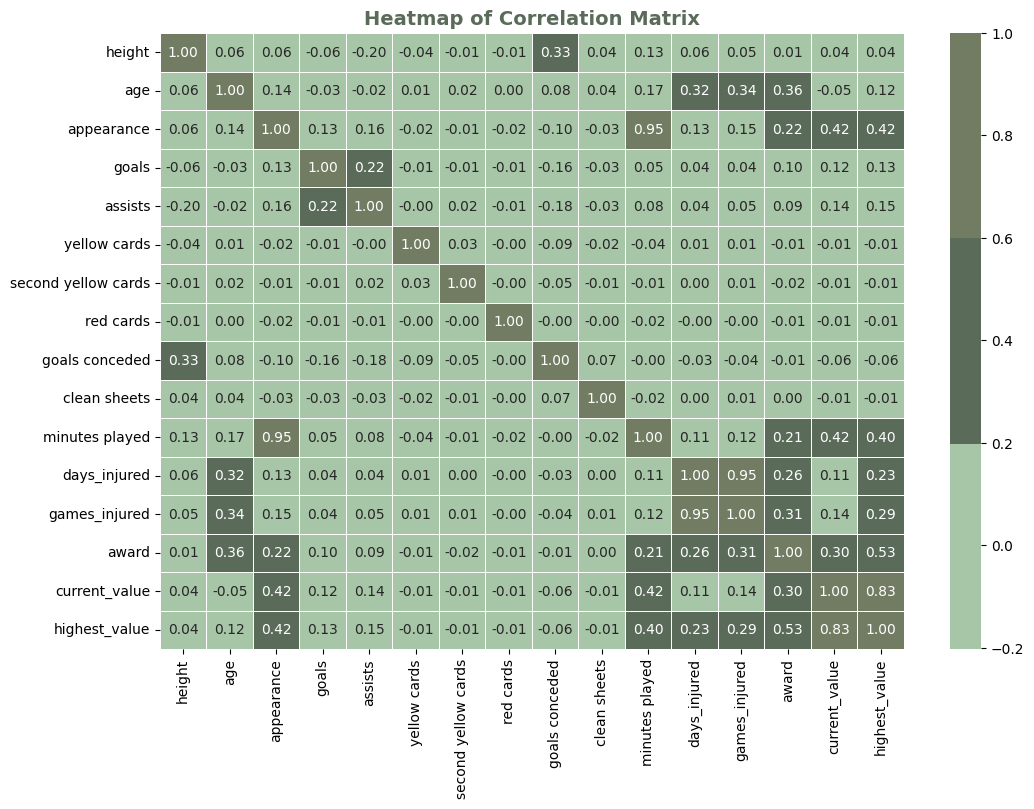

In [40]:
# Specify only numeric columns
numerical_columns = ['height', 'age', 'appearance', 'goals', 'assists',
                     'yellow cards', 'second yellow cards', 'red cards',
                     'goals conceded', 'clean sheets', 'minutes played',
                     'days_injured', 'games_injured', 'award',
                     'current_value', 'highest_value']

# Calculate the correlation coefficient between numeric columns only.
corr_matrix = df[numerical_columns].corr()

# Plot Setting
plt.figure(figsize=(12, 8))

# Choose green shades from football color_palette
cmap_colors = ["#a7c6a7", "#5a6b5a", "#717c62"]
cmap = sns.color_palette(cmap_colors, as_cmap=True)

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, linecolor="white")

# Customize title and labels
plt.title("Heatmap of Correlation Matrix", fontsize=14, fontweight="bold", color="#5a6b5a")
plt.show()

# Building Machine Learning Models

### Preprocess the Data

#### 1- Feature Engineering:

1- Feature scaling

2- Aggregation

3- One hot coding

In [41]:
df.drop(columns=['player', 'position'], inplace=True)

In [42]:
# Display the first 3 rows
df.head(3)

,team,name,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Tom Heaton,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0


In [43]:
# Show label of the columns
df.columns

Index(['team', 'name', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded',
       'winger'],
      dtype='object')

In [44]:
# تحديد الأعمدة الفئوية
categorical_features = ["team", "name"]

# One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_features).astype(int)

In [45]:
df.shape

(10754, 10976)

In [46]:
df.head(1)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,name_Óscar Ustari,name_Óscar Valentín,name_Óscar Villa,name_Óscar de Marcos,name_Ömer Ali Sahiner,name_Ömer Beyaz,name_Ömer Toprak,name_Örjan Nyland,name_Úmaro Embaló,name_Ümit Akdag
0,189,32,104,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### 2- Feature selection:

In [47]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numerical_features].corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value                1.000000
highest_value                0.834553
minutes played               0.420542
appearance                   0.419656
award                        0.300454
                               ...   
team_Gangwon FC             -0.023348
team_Al-Batin FC            -0.023349
team_Daejeon Hana Citizen   -0.024307
age                         -0.050151
goals conceded              -0.062014
Name: current_value, Length: 10976, dtype: float64


In [48]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'award', 'current_value',
       'highest_value', 'team_Manchester City'],
      dtype='object')

In [49]:
selected_features = ['appearance', 'minutes played', 'award', 'current_value', 'highest_value',
       'team_Manchester City']

In [50]:
df = df[selected_features]
df.head()

,appearance,minutes played,award,current_value,highest_value,team_Manchester City
0,104,9390,13,15000000,70000000,0
1,15,1304,1,1500000,22000000,0
2,4,292,4,600000,6000000,0
3,82,6408,9,50000000,50000000,0
4,63,5031,21,40000000,80000000,0


In [51]:
df.shape

(10754, 6)

#### 3- Prepare train and test data:

In [52]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
X.shape

(10754, 5)

### Buliding the Model (Regression)


#### 1- Linear Regression

In [54]:
model = LinearRegression()

##### Train the Model


In [55]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)
print(model)

LinearRegression()


##### Test the Model


In [56]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)      # Linear regression model

##### Interpretation of the Model


In [57]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])   # Linear model cofficients

In [58]:
coeff_df

,Coefficient
appearance,-1.030572e+06
minutes played,1.947302e+06
award,-1.910554e+06
highest_value,8.042601e+06
team_Manchester City,5.879387e+05


In [59]:
print(f" Linear regression intercept: {model.intercept_}")

 Linear regression intercept: 3622354.9924444957


##### Evaluating the Model


**1- Mean Square Error**

In [60]:
y_base = [y_train.mean()] * len(y_test)

In [61]:
y_base

[3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,
 3622354.992444496,


In [62]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 9.043470e+13


In [63]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error for training: 2.119431e+13
Mean Squared Error for testing: 2.376804e+13


**2- Mean Absolute Error**

In [64]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 4.482423e+06


In [65]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 2.095675e+06
Mean Absolute Error for testing: 2.154320e+06


**3- Root Mean Squared Error**


In [66]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 9.509716e+06


In [67]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')

Root Mean Squared Error for training: 4.603728e+06
Root Mean Squared Error for testing: 4.875248e+06


**4- R Square**

In [68]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7376603120850251
R Square for testing: 0.7371800724945163


**Predictions vs. Real Values**


In [69]:
predictions = model.predict(X_test_scaled)
# Predictions

In [70]:
predictions

array([  -88314.40671735, 87320905.07344502,  5949501.03130896, ...,
        4453571.96495463,  2828758.11541929,  2783166.61334678])

In [71]:
Real_Values = np.array(y_test)
# Real_Values

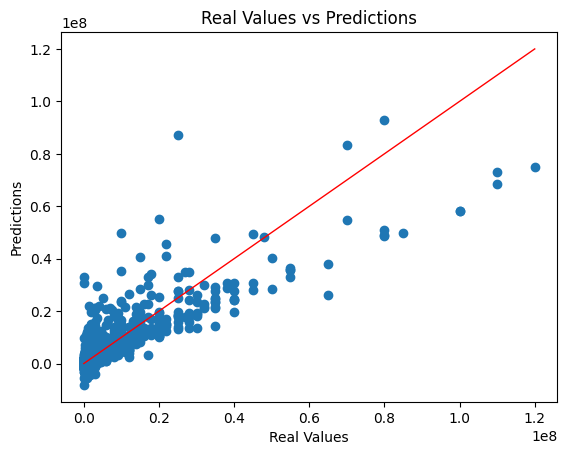

In [72]:
plt.scatter(Real_Values, predictions)
plt.plot([Real_Values.min(), Real_Values.max()], [Real_Values.min(), Real_Values.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions')
plt.show()

**Residual Histogram**

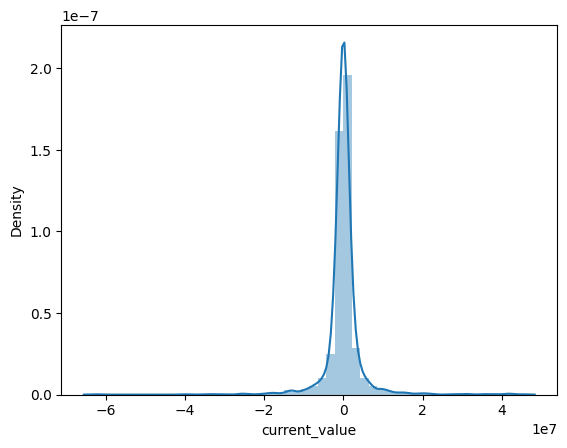

In [73]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution

#### 2- Random Forest Regression

Mean Squared Error for training (Random Forest): 2.741027e+12
Mean Squared Error for testing (Random Forest): 1.803061e+13
------------------------------------------------------------
Mean Absolute Error for training (Random Forest): 5.755036e+05
Mean Absolute Error for testing (Random Forest): 1.551389e+06
------------------------------------------------------------
Root Mean Squared Error for training (Random Forest): 1.655605e+06
Root Mean Squared Error for testing (Random Forest): 4.246247e+06
------------------------------------------------------------
R Square for training (Random Forest): 0.9660720270477703
R Square for testing (Random Forest): 0.8006228231114336
------------------------------------------------------------


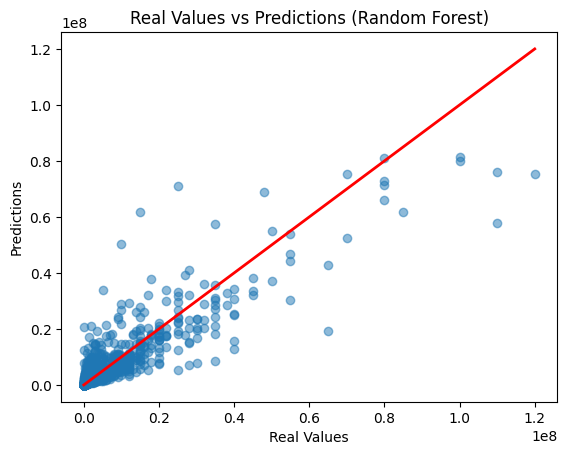

------------------------------------------------------------


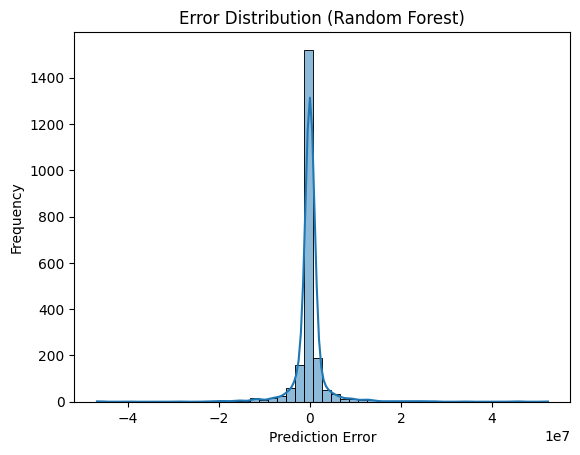

In [74]:
# Build the moder
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Model training
rf_model.fit(X_train_scaled, y_train)

# Prediction on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Model Evaluation
# Calculate Mean Squared Error (MSE)
mse_rf_train = mean_squared_error(y_train, rf_model.predict(X_train_scaled))
mse_rf_test = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error for training (Random Forest): {mse_rf_train:2e}')
print(f'Mean Squared Error for testing (Random Forest): {mse_rf_test:2e}')
print(20*'---')

# Calculate Mean Absolute Error (MAE)
mae_rf_train = mean_absolute_error(y_train, rf_model.predict(X_train_scaled))
mae_rf_test = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error for training (Random Forest): {mae_rf_train:2e}')
print(f'Mean Absolute Error for testing (Random Forest): {mae_rf_test:2e}')
print(20*'---')

# Calculate Root Mean Squared Error (RMSE)
rmse_rf_train = np.sqrt(mse_rf_train)
rmse_rf_test = np.sqrt(mse_rf_test)
print(f'Root Mean Squared Error for training (Random Forest): {rmse_rf_train:2e}')
print(f'Root Mean Squared Error for testing (Random Forest): {rmse_rf_test:2e}')
print(20*'---')

# Calculate R-Squared Score
r2_rf_train = r2_score(y_train, rf_model.predict(X_train_scaled))
r2_rf_test = r2_score(y_test, y_pred_rf)
print(f'R Square for training (Random Forest): {r2_rf_train}')
print(f'R Square for testing (Random Forest): {r2_rf_test}')
print(20*'---')

# Scatter Plot between actual and predicted values
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions (Random Forest)')
plt.show()

print(20*'---')

# Error distribution
sns.histplot((y_test - y_pred_rf), bins=50, kde=True)
plt.title('Error Distribution (Random Forest)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


#### 3- Polynomial Regression

Mean Squared Error for training (Polynomial Regression): 1.539200e+13
Mean Squared Error for testing (Polynomial Regression): 2.001314e+13
------------------------------------------------------------
Mean Absolute Error for training (Polynomial Regression): 1.702784e+06
Mean Absolute Error for testing (Polynomial Regression): 1.810033e+06
------------------------------------------------------------
Root Mean Squared Error for training (Polynomial Regression): 3.923264e+06
Root Mean Squared Error for testing (Polynomial Regression): 4.473604e+06
------------------------------------------------------------
R Square for training (Polynomial Regression): 0.8094803944052197
R Square for testing (Polynomial Regression): 0.7787006715670524
------------------------------------------------------------


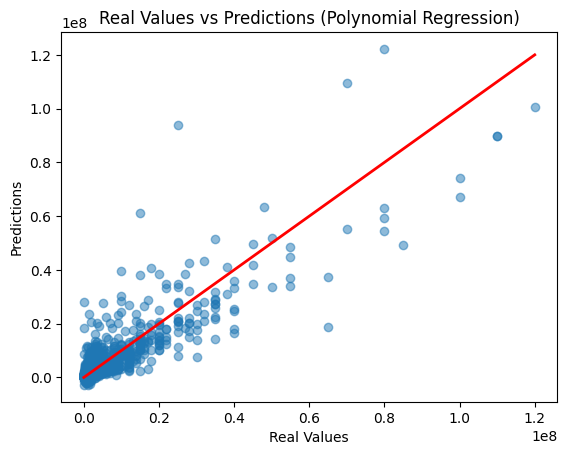

------------------------------------------------------------


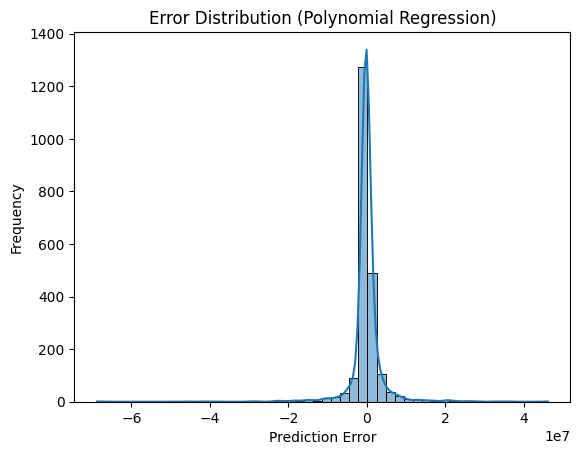

In [75]:
# Convert features to polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Create a linear regression model after transforming the features.
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Prediction on test data
y_pred_poly = poly_model.predict(X_test_poly)

# Model Evaluation
# Calculate Mean Squared Error (MSE)
mse_poly_train = mean_squared_error(y_train, poly_model.predict(X_train_poly))
mse_poly_test = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error for training (Polynomial Regression): {mse_poly_train:2e}')
print(f'Mean Squared Error for testing (Polynomial Regression): {mse_poly_test:2e}')
print(20*'---')

# Calculate Mean Absolute Error (MAE)
mae_poly_train = mean_absolute_error(y_train, poly_model.predict(X_train_poly))
mae_poly_test = mean_absolute_error(y_test, y_pred_poly)
print(f'Mean Absolute Error for training (Polynomial Regression): {mae_poly_train:2e}')
print(f'Mean Absolute Error for testing (Polynomial Regression): {mae_poly_test:2e}')
print(20*'---')

# Calculate Root Mean Squared Error (RMSE)
rmse_poly_train = np.sqrt(mse_poly_train)
rmse_poly_test = np.sqrt(mse_poly_test)
print(f'Root Mean Squared Error for training (Polynomial Regression): {rmse_poly_train:2e}')
print(f'Root Mean Squared Error for testing (Polynomial Regression): {rmse_poly_test:2e}')
print(20*'---')

# Calculate R-Squared Score
r2_poly_train = r2_score(y_train, poly_model.predict(X_train_poly))
r2_poly_test = r2_score(y_test, y_pred_poly)
print(f'R Square for training (Polynomial Regression): {r2_poly_train}')
print(f'R Square for testing (Polynomial Regression): {r2_poly_test}')
print(20*'---')

# Scatter Plot between actual and predicted values
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions (Polynomial Regression)')
plt.show()
print(20*'---')

# Error distribution
sns.histplot((y_test - y_pred_poly), bins=50, kde=True)
plt.title('Error Distribution (Polynomial Regression)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()



#### 4- Decision Tree Regression

Mean Squared Error for training (Decision Tree Regression): 1.013999e+09
Mean Squared Error for testing (Decision Tree Regression): 3.547612e+13
------------------------------------------------------------
Mean Absolute Error for training (Decision Tree Regression): 1.890413e+03
Mean Absolute Error for testing (Decision Tree Regression): 1.949408e+06
------------------------------------------------------------
Root Mean Squared Error for training (Decision Tree Regression): 3.184335e+04
Root Mean Squared Error for testing (Decision Tree Regression): 5.956183e+06
------------------------------------------------------------
R Square for training (Decision Tree Regression): 0.9999874488917022
R Square for testing (Decision Tree Regression): 0.6077155868590092
------------------------------------------------------------


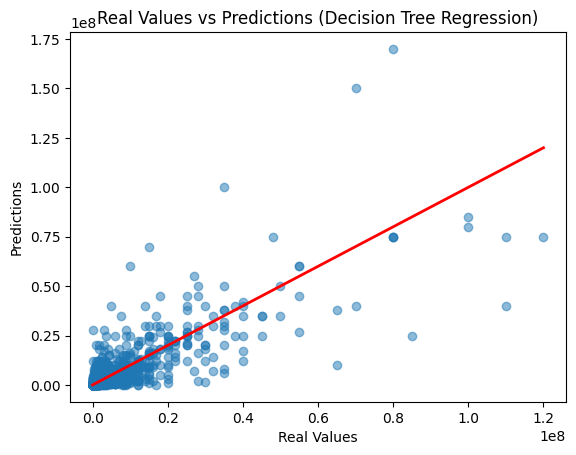

------------------------------------------------------------


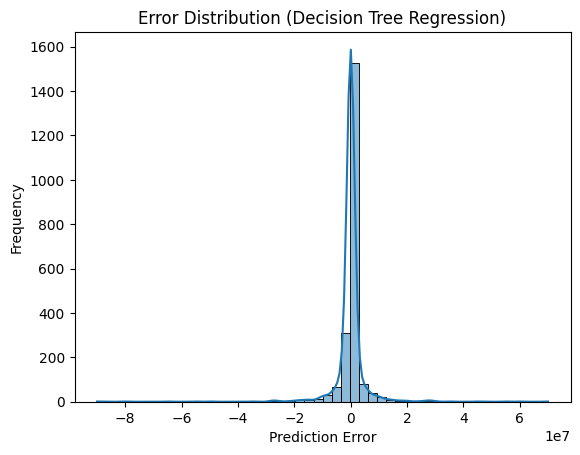

In [76]:
# Build the model
dt_model = DecisionTreeRegressor(random_state=42)

# Model training
dt_model.fit(X_train_scaled, y_train)

# Prediction on test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Model Evaluation
# Calculate Mean Squared Error (MSE)
mse_dt_train = mean_squared_error(y_train, dt_model.predict(X_train_scaled))
mse_dt_test = mean_squared_error(y_test, y_pred_dt)
print(f'Mean Squared Error for training (Decision Tree Regression): {mse_dt_train:2e}')
print(f'Mean Squared Error for testing (Decision Tree Regression): {mse_dt_test:2e}')
print(20*'---')

# Calculate Mean Absolute Error (MAE)
mae_dt_train = mean_absolute_error(y_train, dt_model.predict(X_train_scaled))
mae_dt_test = mean_absolute_error(y_test, y_pred_dt)
print(f'Mean Absolute Error for training (Decision Tree Regression): {mae_dt_train:2e}')
print(f'Mean Absolute Error for testing (Decision Tree Regression): {mae_dt_test:2e}')
print(20*'---')

# Calculate Root Mean Squared Error (RMSE)
rmse_dt_train = np.sqrt(mse_dt_train)
rmse_dt_test = np.sqrt(mse_dt_test)
print(f'Root Mean Squared Error for training (Decision Tree Regression): {rmse_dt_train:2e}')
print(f'Root Mean Squared Error for testing (Decision Tree Regression): {rmse_dt_test:2e}')
print(20*'---')

# Calculate R-Squared Score
r2_dt_train = r2_score(y_train, dt_model.predict(X_train_scaled))
r2_dt_test = r2_score(y_test, y_pred_dt)
print(f'R Square for training (Decision Tree Regression): {r2_dt_train}')
print(f'R Square for testing (Decision Tree Regression): {r2_dt_test}')
print(20*'---')

# Scatter Plot between actual and predicted values
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions (Decision Tree Regression)')
plt.show()
print(20*'---')

# Error distribution
sns.histplot((y_test - y_pred_dt), bins=50, kde=True)
plt.title('Error Distribution (Decision Tree Regression)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

#### 5- Gradient Boosting Regression

Mean Squared Error for training (Gradient Boosting Regression): 9.479965e+12
Mean Squared Error for testing (Gradient Boosting Regression): 1.876101e+13
------------------------------------------------------------
Mean Absolute Error for training (Gradient Boosting Regression): 1.366449e+06
Mean Absolute Error for testing (Gradient Boosting Regression): 1.605529e+06
------------------------------------------------------------
Root Mean Squared Error for training (Gradient Boosting Regression): 3.078955e+06
Root Mean Squared Error for testing (Gradient Boosting Regression): 4.331398e+06
------------------------------------------------------------
R Square for training (Gradient Boosting Regression): 0.8826585811085167
R Square for testing (Gradient Boosting Regression): 0.7925463191155783
------------------------------------------------------------


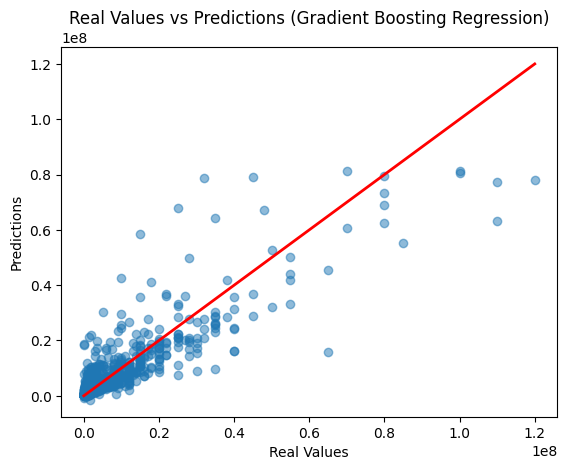

------------------------------------------------------------


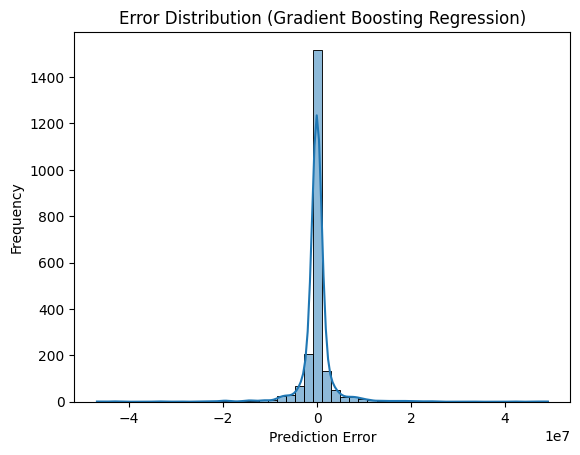

In [77]:
# Bulid the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Model training
gb_model.fit(X_train_scaled, y_train)

# Prediction on test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Model Evaluation
# Calculate Mean Squared Error (MSE)
mse_gb_train = mean_squared_error(y_train, gb_model.predict(X_train_scaled))
mse_gb_test = mean_squared_error(y_test, y_pred_gb)
print(f'Mean Squared Error for training (Gradient Boosting Regression): {mse_gb_train:2e}')
print(f'Mean Squared Error for testing (Gradient Boosting Regression): {mse_gb_test:2e}')
print(20*'---')

# Calculate Mean Absolute Error (MAE)
mae_gb_train = mean_absolute_error(y_train, gb_model.predict(X_train_scaled))
mae_gb_test = mean_absolute_error(y_test, y_pred_gb)
print(f'Mean Absolute Error for training (Gradient Boosting Regression): {mae_gb_train:2e}')
print(f'Mean Absolute Error for testing (Gradient Boosting Regression): {mae_gb_test:2e}')
print(20*'---')

# Calculate Root Mean Squared Error (RMSE)
rmse_gb_train = np.sqrt(mse_gb_train)
rmse_gb_test = np.sqrt(mse_gb_test)
print(f'Root Mean Squared Error for training (Gradient Boosting Regression): {rmse_gb_train:2e}')
print(f'Root Mean Squared Error for testing (Gradient Boosting Regression): {rmse_gb_test:2e}')
print(20*'---')

# Calculate R-Squared Score
r2_gb_train = r2_score(y_train, gb_model.predict(X_train_scaled))
r2_gb_test = r2_score(y_test, y_pred_gb)
print(f'R Square for training (Gradient Boosting Regression): {r2_gb_train}')
print(f'R Square for testing (Gradient Boosting Regression): {r2_gb_test}')
print(20*'---')

# Scatter Plot between actual values ​​and predictions
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions (Gradient Boosting Regression)')
plt.show()
print(20*'---')

# Error distribution
sns.histplot((y_test - y_pred_gb), bins=50, kde=True)
plt.title('Error Distribution (Gradient Boosting Regression)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

## **Best Model: Random Forest Regression**
### **Reasons:**
1. **Lowest Mean Squared Error (MSE) on test data** compared to other models.
2. **Lowest Mean Absolute Error (MAE),** indicating more accurate predictions.
3. **Lowest Root Mean Squared Error (RMSE),** reflecting good predictive performance.
4. **High \( R^2 \) score (0.80 on test data),** meaning it explains a large portion of data variance.

### **Why Not the Other Models?**
1. **Polynomial Regression:**  
   - Performs well but has a lower \( R^2 \) than Random Forest.
   - Higher MSE and RMSE compared to Random Forest.

2. **Decision Tree Regression:**  
   - Suffers from **Overfitting** as \( R^2 \) on training is near 1, but much lower on testing (0.60).
   - Poorer performance on test data compared to other models.

3. **Gradient Boosting Regression:**  
   - Close performance to Random Forest but slightly lower \( R^2 \).
   - Higher RMSE and MAE than Random Forest.

### **Conclusion:**
**Random Forest Regression is the best choice as it balances accuracy and complexity while handling data robustly without severe overfitting like Decision Tree.**


## Model Optimization

### Linear Regression

In [82]:
from sklearn.linear_model import Lasso, Ridge

#  Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)


#  Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

Ridge Regression 
Mean Squared Error (MSE): 23,767,698,824,413.04
Mean Absolute Error (MAE): 2,154,138.82
Root Mean Squared Error (RMSE): 4,875,212.70
R² Score: 0.7372
--------------------------------------------------
Lasso Regression 
Mean Squared Error (MSE): 23,768,038,567,764.84
Mean Absolute Error (MAE): 2,154,320.06
Root Mean Squared Error (RMSE): 4,875,247.54
R² Score: 0.7372
--------------------------------------------------


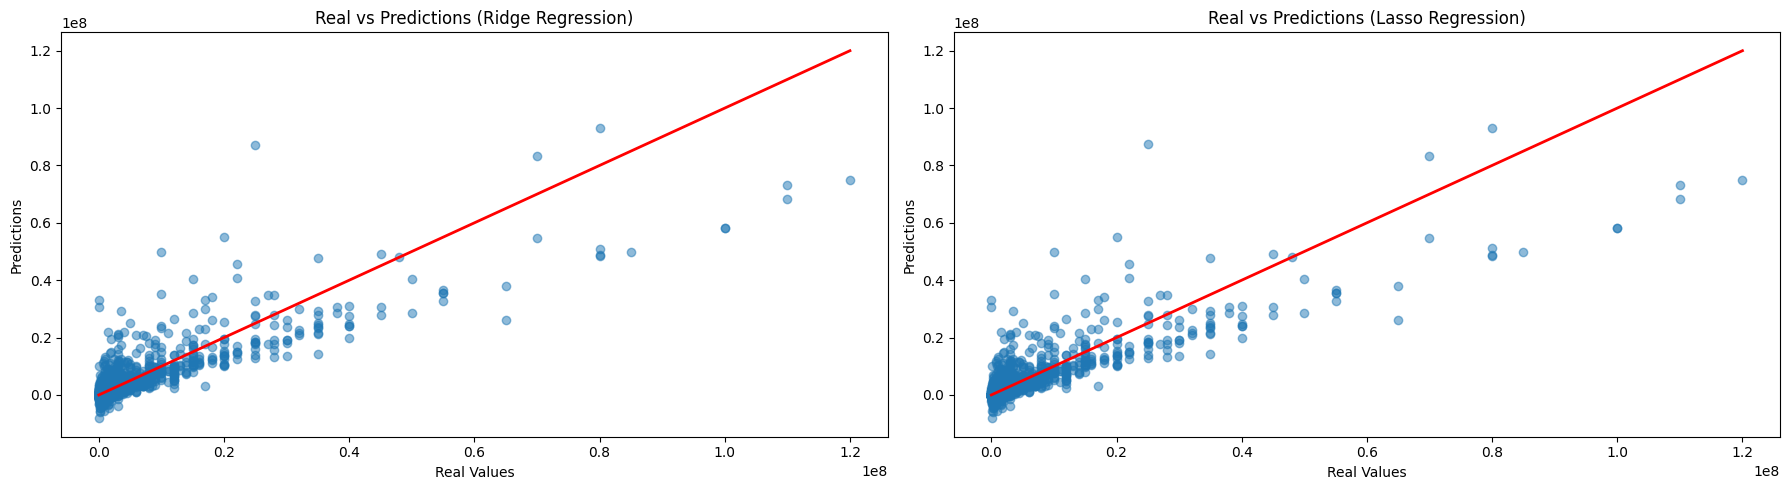

In [87]:
# Calculate measurements for each model.
models = {
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso
}

results = []
for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append([model_name, mse, mae, rmse, r2])

    # Print measurements for each model
    print(f"{model_name} ")
    print(f"Mean Squared Error (MSE): {mse:,.2f}")
    print(f"Mean Absolute Error (MAE): {mae:,.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 50)


# Plot the relationship between the actual values ​​and the predictions for each model.
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

for i, (model_name, y_pred) in enumerate(models.items()):
    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    axes[i].set_xlabel("Real Values")
    axes[i].set_ylabel("Predictions")
    axes[i].set_title(f"Real vs Predictions ({model_name})")

plt.tight_layout()
plt.show()
